# Introduction to Pandas
*by Jonathan Frawley*

We are going to look at parsing datasets using CSV with a library called [Pandas](https://pandas.pydata.org/). 

First, we import our dependencies:

In [22]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

## Parsing CSV

Here, we read in a simple CSV file from a string:

In [23]:
csv_string_file = StringIO("""name,age,course
Muire,23,Computer Science
Seán,19,Computer Science
Saoirse,17,English
Niamh,19,Mathematics
""")
csv = pd.read_csv(csv_string_file)
csv

,name,age,course
0,Muire,23,Computer Science
1,Seán,19,Computer Science
2,Saoirse,17,English
3,Niamh,19,Mathematics


Now, say we wanted all of the students who studied Computer Science:

In [24]:
csv[csv['course'] == 'Computer Science']

,name,age,course
0,Muire,23,Computer Science
1,Seán,19,Computer Science


Use describe() to get a summary of the numeric columns of your dataframe:

In [25]:
csv.describe()

,age
count,4.000000
mean,19.500000
std,2.516611
min,17.000000
25%,18.500000
50%,19.000000
75%,20.000000
max,23.000000


## Using groupby

Get average age of students on a course:

In [26]:
csv.groupby('course').mean()

,age
course,
Computer Science,21
English,17
Mathematics,19


# Sorting data

In [27]:
csv_string_file = StringIO("""item_name,item_price
Hammer,1.90
Nail,0.20
Scissors,3.00
Lawnmower,99.90
""")
csv = pd.read_csv(csv_string_file)
csv

,item_name,item_price
0,Hammer,1.9
1,Nail,0.2
2,Scissors,3.0
3,Lawnmower,99.9


In [28]:
csv.sort_values('item_price')

,item_name,item_price
1,Nail,0.2
0,Hammer,1.9
2,Scissors,3.0
3,Lawnmower,99.9


In [29]:
csv.sort_values('item_price', ascending=False)

,item_name,item_price
3,Lawnmower,99.9
2,Scissors,3.0
0,Hammer,1.9
1,Nail,0.2


## Getting a column's values
Getting the name of most expensive item:

In [30]:
csv.sort_values('item_price', ascending=False)['item_name'].iloc[0]

'Lawnmower'

## Getting an index

In [31]:
csv.sort_values('item_price', ascending=False).index[0]

3

## Plotting Data

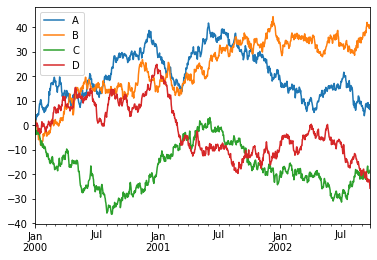

In [32]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()


df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD')) 

df = df.cumsum()

df.plot()

## IMDB Example

In [33]:
import pandas as pd

# From: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset/data
url = "https://raw.githubusercontent.com/jonathanfrawley/data_analysis_and_machine_learning_course/master/data/movie_metadata.csv"
c = pd.read_csv(url)

How many films has Steven Spielberg directed?

In [34]:
spielberg_films = c[c['director_name'] == 'Steven Spielberg']
len(spielberg_films)

26

What is Steven Spielberg's highest grossing film?

In [35]:
spielberg_films.sort_values('gross', ascending=False).iloc[0]['movie_title'].strip()

'E.T. the Extra-Terrestrial'

Graphing how much money Steven Spielberg films have made over time:

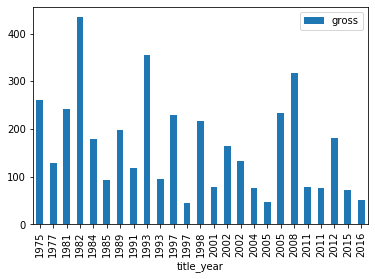

In [45]:
spielberg_films = spielberg_films.dropna(how='any')

import matplotlib.pyplot as plt
plt.close('all')
spielberg_films['title_year'] = spielberg_films['title_year'].astype('int32')
spielberg_films['gross'] = spielberg_films['gross'].astype('int32')
spielberg_films_sorted = spielberg_films.sort_values('title_year')
spielberg_films_sorted.plot.bar(x='title_year', y='gross', style='o')
spielberg_films_sorted['gross'] = spielberg_films_sorted[spielberg_films_sorted['gross'].notnull()]

In [37]:
spielberg_films_by_title_year = spielberg_films.groupby('title_year').sum()
spielberg_films_by_title_year[0:5]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,
1975,385.0,130.0,14000.0,366.0,813.0,260000000,412454,2047,0.0,962.0,8000000.0,559.0,8.0,2.35,21000
1977,171.0,135.0,14000.0,252.0,559.0,128300000,139288,1591,0.0,339.0,19400870.0,481.0,7.7,2.35,0
1981,234.0,115.0,14000.0,488.0,11000.0,242374454,661017,12906,1.0,771.0,18000000.0,783.0,8.5,2.35,16000
1982,215.0,120.0,14000.0,548.0,861.0,434949459,281842,2811,0.0,515.0,10500000.0,725.0,7.9,1.85,34000
1984,148.0,118.0,14000.0,237.0,11000.0,179870271,329969,11898,2.0,524.0,28000000.0,429.0,7.6,2.35,0


# Convert to units of millions of dollars

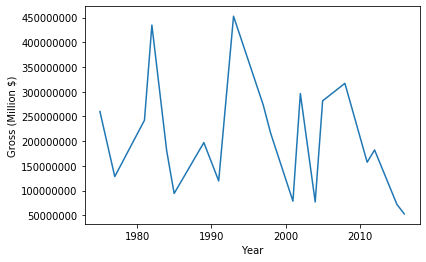

In [38]:
spielberg_films['gross'] = spielberg_films['gross'] / 1000000

import matplotlib.pyplot as plt
plt.plot(spielberg_films_by_title_year.index, spielberg_films_by_title_year['gross'])
plt.xlabel('Year')
plt.ylabel('Gross (Million $)')
plt.ticklabel_format(style='plain')
plt.show()

## Smoothing data
Maybe we could make it look a bit better by smoothing the data a bit?

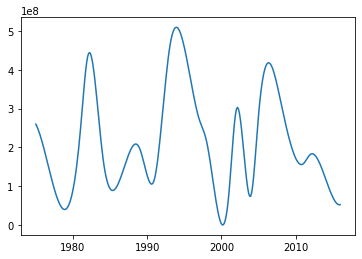

In [39]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

x = spielberg_films_by_title_year.index.to_numpy()
y = spielberg_films_by_title_year['gross'].to_numpy()

xnew = np.linspace(x.min(), x.max(), 300) 
spl = make_interp_spline(x, y, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

## Resources
 * [10 minutes intro to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)